In [1]:
# Autor: Elvis do A. Soares
# Github: @elvissoares
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import animation
from matplotlib.animation import PillowWriter
import scienceplots
plt.style.use(['science', 'notebook'])
from itertools import combinations

# Distribuição de Maxwell-Boltzmann

Vamos considerar partículas em uma caixa

In [2]:
n_particles = 16
r = np.random.random((2,n_particles))
# Colorir as partículas de cada lado
ixr = r[0]>0.5 #direita
ixl = r[0]<=0.5 #esquerda

Vamo dar um ID para cada partícula

In [3]:
ids = np.arange(n_particles)

Gráfico da configuração inicial

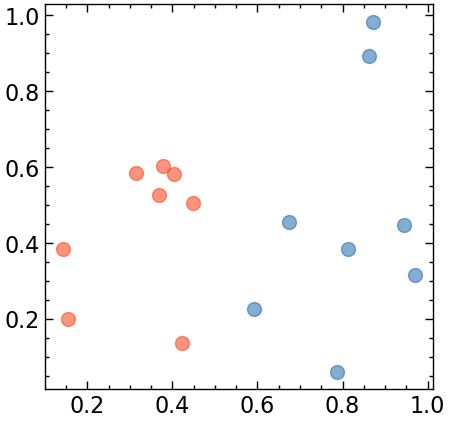

In [4]:
plt.figure(figsize=(5,5))
plt.plot(r[0][ixr],r[1][ixr],'o',color='C0',ms=10.0,alpha=0.5)
plt.plot(r[0][ixl],r[1][ixl],'o',color='C3',ms=10.0,alpha=0.5)

Velocidades das partículas

In [5]:
v = np.zeros((2,n_particles))
v[0][ixr] = -500
v[0][ixl] = 500

## Pares de partículas

Para N partículas temos N*(N-1)/2 combinações possíveis de pares

In [6]:
ids_pairs = np.asarray(list(combinations(ids,2)))

Distância entre pares de partículas

In [7]:
x_pairs = np.array([r[0][ids_pairs[:,0]], r[0][ids_pairs[:,1]]]).T
x_pairs

array([[0.67312284, 0.15526489],
       [0.67312284, 0.377928  ],
       [0.67312284, 0.86283702],
       [0.67312284, 0.40488161],
       [0.67312284, 0.14210967],
       [0.67312284, 0.97047726],
       [0.67312284, 0.78652418],
       [0.67312284, 0.44823096],
       [0.67312284, 0.94467682],
       [0.67312284, 0.87102109],
       [0.67312284, 0.36795388],
       [0.67312284, 0.3155263 ],
       [0.67312284, 0.59265624],
       [0.67312284, 0.81406664],
       [0.67312284, 0.42342292],
       [0.15526489, 0.377928  ],
       [0.15526489, 0.86283702],
       [0.15526489, 0.40488161],
       [0.15526489, 0.14210967],
       [0.15526489, 0.97047726],
       [0.15526489, 0.78652418],
       [0.15526489, 0.44823096],
       [0.15526489, 0.94467682],
       [0.15526489, 0.87102109],
       [0.15526489, 0.36795388],
       [0.15526489, 0.3155263 ],
       [0.15526489, 0.59265624],
       [0.15526489, 0.81406664],
       [0.15526489, 0.42342292],
       [0.377928  , 0.86283702],
       [0.

Distância relativa na direção X

In [8]:
dx_pairs = np.diff(x_pairs, axis=1).ravel()
dx_pairs

array([-0.51785795, -0.29519484,  0.18971418, -0.26824123, -0.53101317,
        0.29735442,  0.11340134, -0.22489188,  0.27155398,  0.19789825,
       -0.30516896, -0.35759654, -0.0804666 ,  0.14094381, -0.24969992,
        0.22266311,  0.70757213,  0.24961672, -0.01315522,  0.81521237,
        0.63125929,  0.29296607,  0.78941193,  0.71575621,  0.21268899,
        0.16026141,  0.43739135,  0.65880176,  0.26815803,  0.48490902,
        0.02695361, -0.23581833,  0.59254927,  0.40859618,  0.07030296,
        0.56674882,  0.4930931 , -0.00997412, -0.0624017 ,  0.21472824,
        0.43613865,  0.04549492, -0.45795541, -0.72072735,  0.10764024,
       -0.07631284, -0.41460606,  0.0818398 ,  0.00818408, -0.49488314,
       -0.54731072, -0.27018078, -0.04877037, -0.4394141 , -0.26277194,
        0.56559565,  0.38164257,  0.04334935,  0.53979521,  0.46613948,
       -0.03692773, -0.08935531,  0.18777463,  0.40918503,  0.01854131,
        0.82836759,  0.64441451,  0.30612129,  0.80256715,  0.72

Distância total entre os pares

In [9]:
x_pairs = np.array([r[0][ids_pairs[:,0]], r[0][ids_pairs[:,1]]]).T
y_pairs = np.array([r[1][ids_pairs[:,0]], r[1][ids_pairs[:,1]]]).T
dx_pairs = np.diff(x_pairs, axis=1).ravel()
dy_pairs = np.diff(y_pairs, axis=1).ravel()
d_pairs = np.sqrt(dx_pairs**2 + dy_pairs**2)
d_pairs

array([0.57792081, 0.3302857 , 0.47565098, 0.29665966, 0.53591017,
       0.32824584, 0.41052776, 0.23053316, 0.27166443, 0.56324317,
       0.31300839, 0.38026324, 0.2431247 , 0.15787578, 0.40560024,
       0.46190686, 0.99021514, 0.45737052, 0.1847323 , 0.82364082,
       0.64616928, 0.42452443, 0.82769103, 1.06149475, 0.3893801 ,
       0.41782708, 0.4382315 , 0.68439633, 0.2754778 , 0.56400106,
       0.03444579, 0.32280178, 0.65846782, 0.679323  , 0.12017353,
       0.58779929, 0.62202837, 0.07916726, 0.06517973, 0.43436147,
       0.48816122, 0.46998505, 0.55271952, 0.88203234, 0.58518119,
       0.83423147, 0.56612935, 0.45140599, 0.09151947, 0.61585648,
       0.62746222, 0.71834782, 0.5096491 , 0.87425861, 0.3296121 ,
       0.62490429, 0.64603415, 0.08750746, 0.55628709, 0.61464613,
       0.06799081, 0.08939377, 0.40259736, 0.45450035, 0.44671489,
       0.83105137, 0.72050636, 0.32989649, 0.80515773, 0.9438481 ,
       0.26672128, 0.26592976, 0.47716383, 0.67195796, 0.37458

## Velocidade após colisão

$$\vec{v}_1^{\text{new}} = \vec{v}_1 - \frac{(\vec{v}_1 - \vec{v}_2) \cdot (\vec{r}_1 - \vec{r}_2)}{|\vec{r}_1 - \vec{r}_2|^2} (\vec{r}_1 - \vec{r}_2)$$
$$\vec{v}_2^{\text{new}} = \vec{v}_2 - \frac{(\vec{v}_2 - \vec{v}_1) \cdot (\vec{r}_2 - \vec{r}_1)}{|\vec{r}_1 - \vec{r}_2|^2} (\vec{r}_2 - \vec{r}_1)$$

Teste se os pares irão colidir

In [10]:
radius = 0.06
ids_pairs_collide = ids_pairs[d_pairs < 2*radius]
ids_pairs_collide

array([[ 2,  4],
       [ 2, 11],
       [ 2, 12],
       [ 3, 10],
       [ 4,  8],
       [ 4, 11],
       [ 4, 12],
       [ 8, 11],
       [11, 12]])

Todas as partículas a esquerda são "1" e as da direita são "2"

In [11]:
v1 = v[:,ids_pairs_collide[:,0]]
v2 = v[:,ids_pairs_collide[:,1]]
r1 = r[:,ids_pairs_collide[:,0]]
r2 = r[:,ids_pairs_collide[:,1]]

Cálcula novas velocidades

In [12]:
v1new = v1 - ((v1-v2)*(r1-r2)).sum(axis=0)/np.sum((r1-r2)**2, axis=0) * (r1-r2)
v2new = v2 - ((v1-v2)*(r1-r2)).sum(axis=0)/np.sum((r2-r1)**2, axis=0) * (r2-r1)

## Simulação



In [13]:
def get_delta_pairs(x, ids_pairs):
    return np.diff(np.array([x[ids_pairs[:,0]], x[ids_pairs[:,1]]]).T, axis=1).ravel()

def get_deltad_pairs(r, ids_pairs):
    return np.sqrt(get_delta_pairs(r[0], ids_pairs)**2 + get_delta_pairs(r[1], ids_pairs)**2)

def compute_new_v(v1, v2, r1, r2):
    v1new = v1 - ((v1-v2)*(r1-r2)).sum(axis=0)/np.sum((r1-r2)**2, axis=0) * (r1-r2)
    v2new = v2 - ((v1-v2)*(r1-r2)).sum(axis=0)/np.sum((r2-r1)**2, axis=0) * (r2-r1)
    return v1new, v2new

def motion(r, v, id_pairs, ts, dt, d_cutoff):
    rs = np.zeros((ts, r.shape[0], r.shape[1]))
    vs = np.zeros((ts, v.shape[0], v.shape[1]))
    # Initial State
    rs[0] = r.copy()
    vs[0] = v.copy()
    for i in range(1,ts):
        ic = id_pairs[get_deltad_pairs(r, ids_pairs) < d_cutoff]
        v[:,ic[:,0]], v[:,ic[:,1]] = compute_new_v(v[:,ic[:,0]], v[:,ic[:,1]], r[:,ic[:,0]], r[:,ic[:,1]])
        
        v[0,r[0]>1] = -np.abs(v[0,r[0]>1])
        v[0,r[0]<0] = np.abs(v[0,r[0]<0])
        v[1,r[1]>1] = -np.abs(v[1,r[1]>1])
        v[1,r[1]<0] = np.abs(v[1,r[1]<0])
        
        r = r + v*dt
        rs[i] = r.copy()
        vs[i] = v.copy()
    return rs, vs

Define  raio da partícula e evolui a posição de todas elas (`rs` tem informações $(t,x,y)$)

In [14]:
radius = 0.03
rs, vs = motion(r, v, ids_pairs, ts=1000, dt=0.000008, d_cutoff=2*radius)

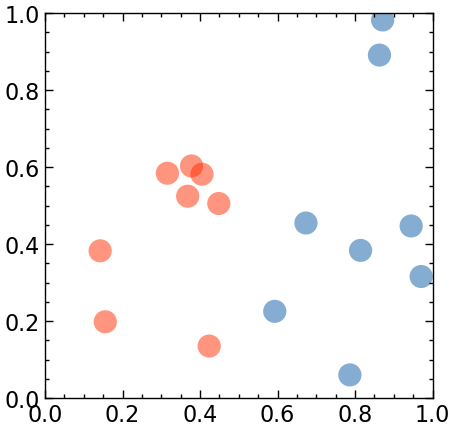

In [15]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
xred, yred = rs[0][0][ixr], rs[0][1][ixr]
xblue, yblue = rs[0][0][ixl],rs[0][1][ixl]
circles_red = [plt.Circle((xi, yi), radius=radius, linewidth=0) for xi,yi in zip(xred,yred)]
circles_blue = [plt.Circle((xi, yi), radius=radius, linewidth=0) for xi,yi in zip(xblue,yblue)]
cred = matplotlib.collections.PatchCollection(circles_red, facecolors='C0',alpha = 0.5)
cblue = matplotlib.collections.PatchCollection(circles_blue, facecolors='C3',alpha = 0.5)
ax.add_collection(cred)
ax.add_collection(cblue)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
plt.show()

Fazendo uma animação

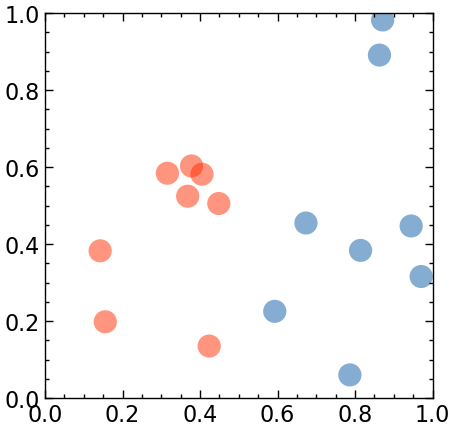

In [16]:
fig, ax = plt.subplots(1,1,figsize=(5,5))

def animate(i):
    ax.clear()
    xred, yred = rs[i][0][ixr], rs[i][1][ixr]
    xblue, yblue = rs[i][0][ixl],rs[i][1][ixl]
    circles_red = [plt.Circle((xi, yi), radius=radius, linewidth=0) for xi,yi in zip(xred,yred)]
    circles_blue = [plt.Circle((xi, yi), radius=radius, linewidth=0) for xi,yi in zip(xblue,yblue)]
    cred = matplotlib.collections.PatchCollection(circles_red, facecolors='C0',alpha = 0.5)
    cblue = matplotlib.collections.PatchCollection(circles_blue, facecolors='C3',alpha = 0.5)
    ax.add_collection(cred)
    ax.add_collection(cblue)
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    
ani = animation.FuncAnimation(fig, animate, frames=500, interval=50)
ani.save('ani3.gif',writer='pillow',fps=30,dpi=100)

## Simulação com 500 partículas


In [17]:
n_particles = 500
r = np.random.random((2,n_particles))
ixr = r[0]>0.5 
ixl = r[0]<=0.5 
ids = np.arange(n_particles)
ids_pairs = np.asarray(list(combinations(ids,2)))
v = np.zeros((2,n_particles))
v[0][ixr] = -500
v[0][ixl] = 500
radius = 0.0015
rs, vs = motion(r, v, ids_pairs, ts=1000, dt=0.000008, d_cutoff=2*radius)

Distribuição de velocidades

* $kT = \langle K \rangle = \frac{1}{2}m\bar{v^2} \implies \boxed{\frac{m}{kT} = \frac{2}{\bar{v^2}}}$
* $\boxed{f(v) = \frac{m}{kT} v \exp\left(-\frac{m}{kT}\frac{v^2}{2} \right)}$

In [18]:
v = np.linspace(0, 2000, 1000)
a = 2/500**2
fv = a*v*np.exp(-a*v**2 / 2)

Histograma de velocidades

Text(0, 0.5, 'Nº de pa')

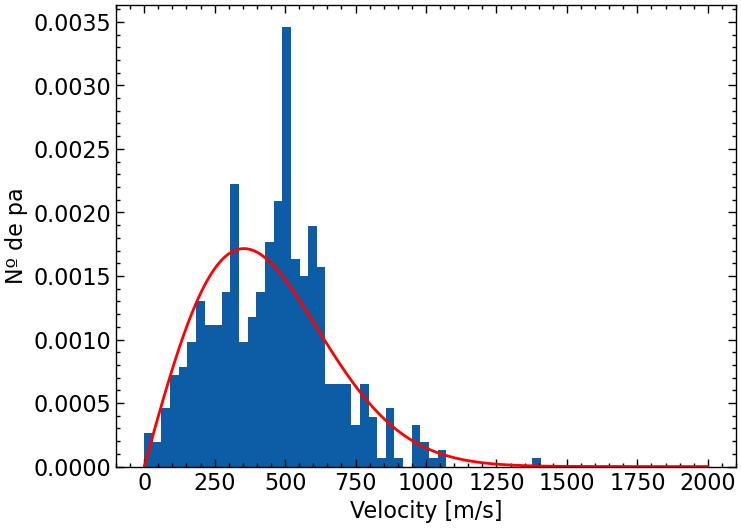

In [ ]:
bins = np.linspace(0,1500,50)
plt.figure()
plt.hist(np.sqrt(np.sum(vs[400]**2, axis=0)), bins=bins, density=True)
plt.plot(v,fv,'r')
plt.xlabel('Velocidades (m/s)')
plt.ylabel('Nº de partículas')

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))

def animate(i):
    [ax.clear() for ax in axes]
    ax = axes[0]
    xred, yred = rs[i][0][ixr], rs[i][1][ixr]
    xblue, yblue = rs[i][0][ixl],rs[i][1][ixl]
    circles_red = [plt.Circle((xi, yi), radius=4*radius, linewidth=0) for xi,yi in zip(xred,yred)]
    circles_blue = [plt.Circle((xi, yi), radius=4*radius, linewidth=0) for xi,yi in zip(xblue,yblue)]
    cred = matplotlib.collections.PatchCollection(circles_red, facecolors='C0',alpha = 0.5)
    cblue = matplotlib.collections.PatchCollection(circles_blue, facecolors='C3',alpha = 0.5)
    ax.add_collection(cred)
    ax.add_collection(cblue)
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    ax = axes[1]
    ax.hist(np.sqrt(np.sum(vs[i]**2, axis=0)), bins=bins, density=True)
    ax.plot(v,fv)
    ax.set_xlabel('Velocidades (m/s)')
    ax.set_.ylabel('Nº de partículas')
    ax.set_xlim(0,1500)
    ax.set_ylim(0,0.006)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    fig.tight_layout()
    
    
ani = animation.FuncAnimation(fig, animate, frames=500, interval=50)
ani.save('ani.gif',writer='pillow',fps=30,dpi=100)